<a href="https://colab.research.google.com/github/JinHuiXu1991/DATA602/blob/main/Week_2_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Perform classification of the iris dataset for setosa and versicolor using petal length..

Adapt the procedure in the notebook, and include 3 plots.

Create a plot of the data

Create a plot of squared error vs epoch

Create a third plot that includes all of the following:

The data

Predictions for a range of inputs that include and extend slightly beyond the data

The activation function

The decision boundary used to predict class membership




# Lab 3 -- Adaline

This notebook a subset of Raschka's ch02.ipynb.

### References

* [Python Machine Learning, 3rd Edition](https://github.com/rasbt/python-machine-learning-book-3rd-edition) (2019) by Rashka & Mirjalili -- github.com
    * [ch02.ipynb](https://github.com/rasbt/python-machine-learning-book-3rd-edition/blob/master/ch02/ch02.ipynb) -- github.com

In [ ]:
# AdalineGD (uses gradient descent)
import numpy as np

class AdalineGD(object):
    """ADAptive LInear NEuron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    cost_ : list
      Sum-of-squares cost function value in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            # Please note that the "activation" method has no effect
            # in the code since it is simply an identity function. We
            # could write `output = self.net_input(X)` directly instead.
            # The purpose of the activation is more conceptual, i.e.,  
            # in the case of logistic regression (as we will see later), 
            # we could change it to
            # a sigmoid function to implement a logistic regression classifier.
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return X

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

# Cost function
Sum of squared errors (SSE):
$$
J(w) = \frac{1}{2} \sum_i \left( y^{(i)} - \phi(z^{(i)}) \right)^2
$$
where
$$
z = w_0 + \sum_{i=1}^p w_i x_i = \mathbf{w}^T \mathbf{x}
$$
For Adaline, $\phi (z) = z$, so $J(w)$ is a quadratic function of $w$ (upward facing parabola) in one dimension.

<img src="https://github.com/rasbt/python-machine-learning-book-3rd-edition/raw/master/ch02/images/02_12.png" width="600"/>


In two dimensions, the cost function is an upward facing bowl with a global minimum. For any combination of $w$, the direction of maximum increase in $J(w)$ occurs in the direction of the gradient $\nabla J$.
$$
J(w+\Delta w) = J(w) + \nabla J \cdot dw
$$
The components of $\nabla J$ are $\frac{J}{dw_j}$, and $dw$ is parallel to $\nabla J$.


Likewise, the most rapid decrease in $J$ occurs in the direction of $ - \nabla J$. So if we want to find the $w$ that minimizes $J$, then we make updates to $w$ in the direction of $-\nabla J$, that is, down the gradient, hence the term gradient descent.

$$
\frac{dJ}{dw_j} = \frac{dJ}{dz} \frac{dz}{dw_j} = 
- \sum_i \left( y^{(i)} - \phi(z^{(i)}) \right) x_j^{(i)}
$$

Remember, we can compute $J(w)$ and $\nabla J$ as a function of $w$. But we don't know the $w$ or $J$ for which $J$ at the minimum. 

We do know is that $\nabla J$ is zero at the minimum. Therefore, we may need to increase the learning rate $\eta$ as we get closer to the minimum.



In [ ]:
# Load the Iris data directly from the UC Irvine archive
import os
import pandas as pd

s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
print('URL:', s)

df = pd.read_csv(s, header=None, encoding='utf-8')

df.tail()

URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [ ]:
# select setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# extract petal length
X = df.iloc[0:100, [2]].values
X


array([[1.4],
       [1.4],
       [1.3],
       [1.5],
       [1.4],
       [1.7],
       [1.4],
       [1.5],
       [1.4],
       [1.5],
       [1.5],
       [1.6],
       [1.4],
       [1.1],
       [1.2],
       [1.5],
       [1.3],
       [1.4],
       [1.7],
       [1.5],
       [1.7],
       [1.5],
       [1. ],
       [1.7],
       [1.9],
       [1.6],
       [1.6],
       [1.5],
       [1.4],
       [1.6],
       [1.6],
       [1.5],
       [1.5],
       [1.4],
       [1.5],
       [1.2],
       [1.3],
       [1.5],
       [1.3],
       [1.5],
       [1.3],
       [1.3],
       [1.3],
       [1.6],
       [1.9],
       [1.4],
       [1.6],
       [1.4],
       [1.5],
       [1.4],
       [4.7],
       [4.5],
       [4.9],
       [4. ],
       [4.6],
       [4.5],
       [4.7],
       [3.3],
       [4.6],
       [3.9],
       [3.5],
       [4.2],
       [4. ],
       [4.7],
       [3.6],
       [4.4],
       [4.5],
       [4.1],
       [4.5],
       [3.9],
       [4.8],
      

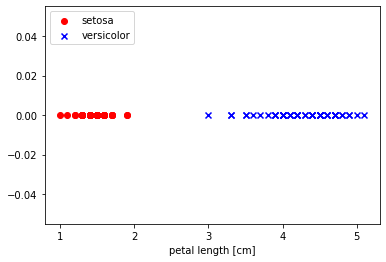

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# plot data
plt.scatter(X[:50, 0], [0 for i in X[:50]],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], [0 for i in X[50:100]],
            color='blue', marker='x', label='versicolor')

plt.xlabel('petal length [cm]')
plt.legend(loc='upper left');

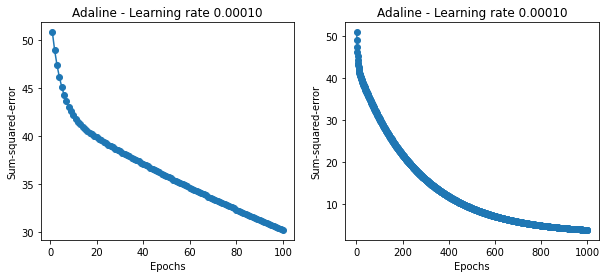

In [ ]:
# Train the model
eta1 = .0001
ada1 = AdalineGD(n_iter=100, eta=eta1).fit(X, y)

# Plot the learning curves
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

ax[0].plot(range(1, len(ada1.cost_) + 1), ada1.cost_, marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Sum-squared-error')
ax[0].set_title('Adaline - Learning rate {:.5f}'.format(eta1))

eta2 = .0001
ada2 = AdalineGD(n_iter=1000, eta=eta2).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate {:.5f}'.format(eta2))
plt.show()



With a convex cost function, increasing $J$ is a sign that the learning rate is too large (right-hand figure below), so you should choose smaller $\eta$.

Conversely, linearly decreasing learning rate is a sign that you may be able to increase the learning rate, or that you're still fairly far away from the minimum $J$.

<img src="https://github.com/rasbt/python-machine-learning-book-3rd-edition/raw/master/ch02/images/02_12.png" width="600"/>


In [ ]:
# Convenience function for plotting the decision region
from matplotlib.colors import ListedColormap

def plot_decision_regions1(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = -1, 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=[0 for i in X[y == cl]],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')
        
    # plot activation function
    x_pred = np.array([[0],[6]])
    classifier_y = x_pred * classifier.w_[1:] + classifier.w_[0]
    plt.plot(x_pred, classifier_y, label='activation function')

    # plot decision boundary
    x0 = - classifier.w_[0] / classifier.w_[1]
    plt.plot([x0], [0], marker='o', label='decision boundary')

Model 1


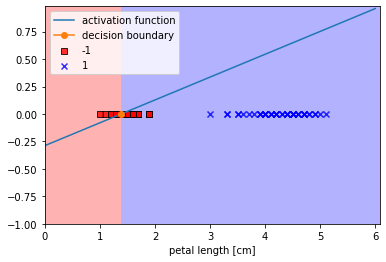

In [ ]:
# Plot the decision region
print('Model 1')
plot_decision_regions1(X, y, classifier=ada1)
plt.xlabel('petal length [cm]')
plt.legend(loc='upper left');



Model 2


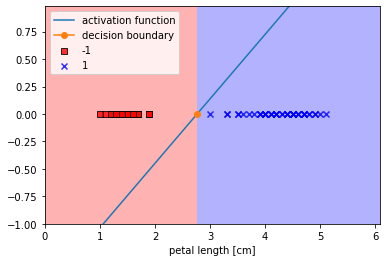

In [ ]:
print('Model 2')
plot_decision_regions1(X, y, classifier=ada2)
plt.xlabel('petal length [cm]')
plt.legend(loc='upper left');


2. Logistic regression in 1-D

Start with lab04_logistic_regression.ipynb

Repeat the analysis above for logistic regression in 1D



# Lab 04 -- Logistic regression

In [ ]:
from sklearn import datasets
import numpy as np

# select setosa and versicolor
iris = datasets.load_iris()
X = iris.data[0:100, [2]]
print(X)

y = iris.target
y = y[:100]
y = np.where(y == 0, 0, 1)
print(y)

print('Class labels:', np.unique(y))

[[1.4]
 [1.4]
 [1.3]
 [1.5]
 [1.4]
 [1.7]
 [1.4]
 [1.5]
 [1.4]
 [1.5]
 [1.5]
 [1.6]
 [1.4]
 [1.1]
 [1.2]
 [1.5]
 [1.3]
 [1.4]
 [1.7]
 [1.5]
 [1.7]
 [1.5]
 [1. ]
 [1.7]
 [1.9]
 [1.6]
 [1.6]
 [1.5]
 [1.4]
 [1.6]
 [1.6]
 [1.5]
 [1.5]
 [1.4]
 [1.5]
 [1.2]
 [1.3]
 [1.4]
 [1.3]
 [1.5]
 [1.3]
 [1.3]
 [1.3]
 [1.6]
 [1.9]
 [1.4]
 [1.6]
 [1.4]
 [1.5]
 [1.4]
 [4.7]
 [4.5]
 [4.9]
 [4. ]
 [4.6]
 [4.5]
 [4.7]
 [3.3]
 [4.6]
 [3.9]
 [3.5]
 [4.2]
 [4. ]
 [4.7]
 [3.6]
 [4.4]
 [4.5]
 [4.1]
 [4.5]
 [3.9]
 [4.8]
 [4. ]
 [4.9]
 [4.7]
 [4.3]
 [4.4]
 [4.8]
 [5. ]
 [4.5]
 [3.5]
 [3.8]
 [3.7]
 [3.9]
 [5.1]
 [4.5]
 [4.5]
 [4.7]
 [4.4]
 [4.1]
 [4. ]
 [4.4]
 [4.6]
 [4. ]
 [3.3]
 [4.2]
 [4.2]
 [4.2]
 [4.3]
 [3. ]
 [4.1]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Class labels: [0 1]


In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X)
X = sc.transform(X)

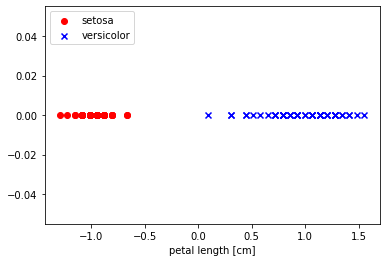

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# plot data
plt.scatter(X[:50, 0], [0 for i in X[:50]],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], [0 for i in X[50:100]],
            color='blue', marker='x', label='versicolor')

plt.xlabel('petal length [cm]')
plt.legend(loc='upper left');

In [ ]:
class LogisticRegressionGD(object):
    def __init__(self, eta=0.05, n_iter=100, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()

            cost = -y.dot(np.log(output)) - ((1 - y).dot(np.log(1 - output)))
            self.cost_.append(cost)
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, z):
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, 0)
        # equivalent to:
        # return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

In [ ]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt


def plot_decision_regions2(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = 0, 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=[.5 for i in X[y == cl]],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')
        
    # plot activation function
    x_pred = np.arange(-3, 3, .1)
    x_pred = x_pred[..., np.newaxis]
    net_input = classifier.net_input(x_pred)
    output = classifier.activation(net_input)
    plt.plot(x_pred, output, label='activation function')

    # plot decision boundary
    x0 = - classifier.w_[0] / classifier.w_[1]
    plt.plot([x0], 0.5, marker='o', label='decision boundary')

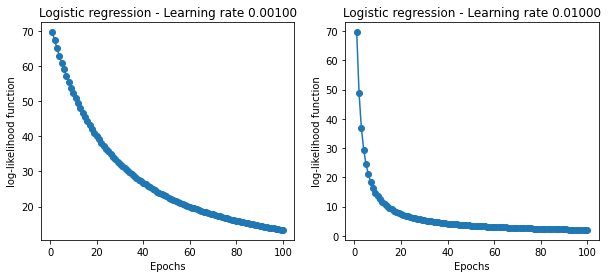

In [ ]:
# Train the model
X_train = X[(y == 0) | (y == 1)]
y_train = y[(y == 0) | (y == 1)]

eta1 = .001
lrgd1 = LogisticRegressionGD(eta=eta1, n_iter=100, random_state=1)
lrgd1.fit(X_train, y_train)

# Plot the learning curves
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

ax[0].plot(range(1, len(lrgd1.cost_) + 1), lrgd1.cost_, marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log-likelihood function')
ax[0].set_title('Logistic regression - Learning rate {:.5f}'.format(eta1))

eta2 = .01
lrgd2 = LogisticRegressionGD(eta=eta2, n_iter=100, random_state=1)
lrgd2.fit(X_train, y_train)
ax[1].plot(range(1, len(lrgd2.cost_) + 1), lrgd2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('log-likelihood function')
ax[1].set_title('Logistic regression - Learning rate {:.5f}'.format(eta2))
plt.show()

Model 1


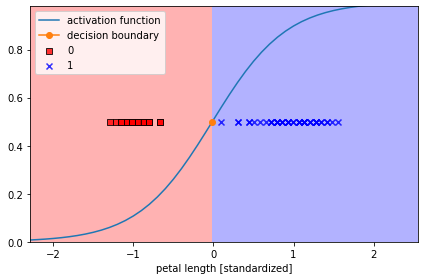

In [ ]:
print('Model 1')
plot_decision_regions2(X=X_train, y=y_train, classifier=lrgd1)

plt.xlabel('petal length [standardized]')
plt.legend(loc='upper left')

plt.tight_layout();

Model 2


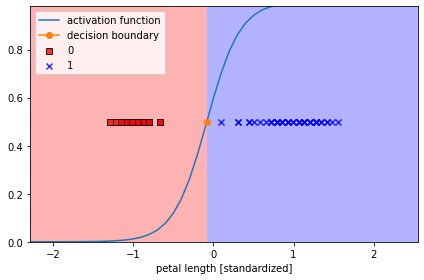

In [ ]:
print('Model 2')
plot_decision_regions2(X=X_train, y=y_train, classifier=lrgd2)

plt.xlabel('petal length [standardized]')
plt.legend(loc='upper left')

plt.tight_layout();